In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create new dataframe with four column
df = pd.DataFrame({
    'Age': [32, 35, 21, 29, 40, 39, 43],
    'Income': [30000, 35000, 26000, 28000, 45000, 33000, 40000],
    'Saving': [2000, 3000, 1000, 2500, 3400, 2300, 2800],
    'DailySpending': [100, 200, 80, 99, 150, 150, 200]
})
df

,Age,Income,Saving,DailySpending
0,32,30000,2000,100
1,35,35000,3000,200
2,21,26000,1000,80
3,29,28000,2500,99
4,40,45000,3400,150
5,39,33000,2300,150
6,43,40000,2800,200


In [36]:
# Scale data using standard scaler
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
standardized_df

,Age,Income,Saving,DailySpending
0,-0.307083,-0.615547,-0.593159,-0.882425
1,0.122833,0.182384,0.790878,1.331545
2,-1.883444,-1.253892,-1.977196,-1.325220
3,-0.737000,-0.934720,0.098860,-0.904565
4,0.839361,1.778247,1.344493,0.224560
5,0.696055,-0.136788,-0.177948,0.224560
6,1.269277,0.980316,0.514071,1.331545


### PCA (Principal Component Analysis)

In [37]:
# Use PCA to reduce the high-dimensional data into fewer dimensions while keeping maximum important information.
# PCA reduces the number of features by creating new features called principal components.
# Use PCA and pass n_components (Number of columns) and train the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_df)
pca_result_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
variance_ratio = pca.explained_variance_ratio_

# vairance ratio is Spread of data (more variance = more information), based on result PCA1 column hold 83.9 % of data and PCA2 hold 8.08%
print("variance ratio per column", np.round(variance_ratio * 100, 2))
print('\n')
print(pca_result_df)

variance ratio per column [83.9   8.08]


       PCA1      PCA2
0 -1.189241 -0.213707
1  1.190452  0.666184
2 -3.226339  0.141315
3 -1.236405 -0.408227
4  2.109108 -1.082968
5  0.307869  0.372381
6  2.044555  0.525022


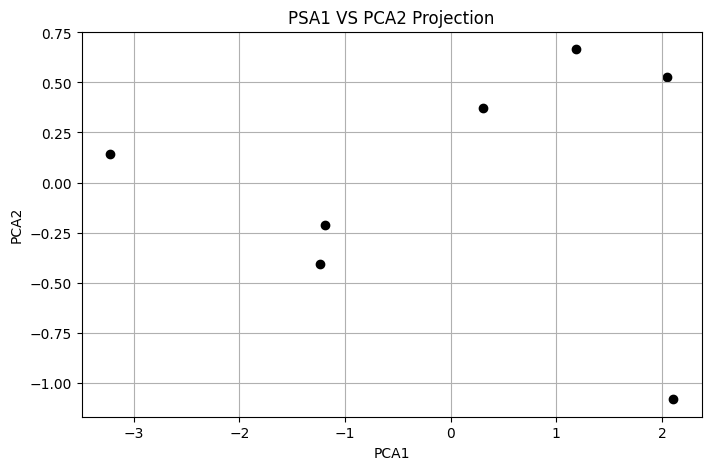

In [38]:
# Plot scatter plot based on PCA1 and PCA2
plt.figure(figsize=(8, 5))
plt.scatter(pca_result_df['PCA1'], pca_result_df['PCA2'], color="black")
plt.title("PSA1 VS PCA2 Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()